In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_hdf("diagnostic_data_general.h5", key="df")
df

,pytest_obj,status,duration_ms,basis,molname,t1diag,d1diag,maxt2,maxt1
test_id,,,,,,,,,
test_gaussian_noise[n2-sto-3g],<function test_gaussian_noise at 0x7f1b4689bca0>,passed,427.723151,sto-3g,n2,0.002655,0.009934,0.133240,0.009934
test_gaussian_noise[n2-6-31g],<function test_gaussian_noise at 0x7f1b4689bca0>,passed,436.695268,6-31g,n2,0.009794,0.024250,0.111010,0.023796
test_gaussian_noise[n2-6-31g**],<function test_gaussian_noise at 0x7f1b4689bca0>,passed,1044.414455,6-31g**,n2,0.009723,0.023950,0.069648,0.019713
test_gaussian_noise[n2-cc-pvdz],<function test_gaussian_noise at 0x7f1b4689bca0>,passed,885.132417,cc-pvdz,n2,0.009707,0.023983,0.093785,0.014199
test_gaussian_noise[n2-aug-cc-pvdz],<function test_gaussian_noise at 0x7f1b4689bca0>,passed,1326.272460,aug-cc-pvdz,n2,0.010821,0.023104,0.049350,0.018772
...,...,...,...,...,...,...,...,...,...
test_gaussian_noise[p-benzyne-sto-3g],<function test_gaussian_noise at 0x7f1b4689bca0>,passed,2099.809485,sto-3g,p-benzyne,0.017482,0.103839,0.538726,0.097031
test_gaussian_noise[p-benzyne-6-31g],<function test_gaussian_noise at 0x7f1b4689bca0>,passed,8540.077517,6-31g,p-benzyne,0.015605,0.069416,0.399409,0.064510
test_gaussian_noise[p-benzyne-6-31g**],<function test_gaussian_noise at 0x7f1b4689bca0>,passed,21366.135571,6-31g**,p-benzyne,0.015178,0.061722,0.342353,0.055621


/fs/home/cvsik/miniforge3/envs/tcc/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


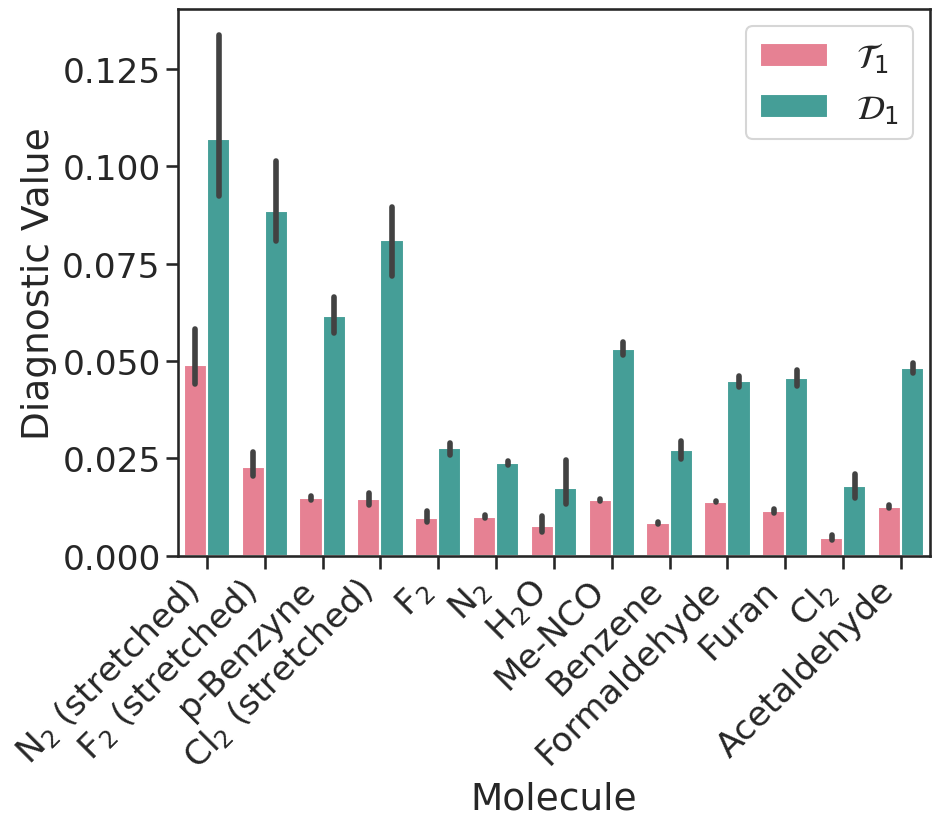

In [37]:
# df.sort_values("d1diag", inplace=True, ascending=False)
nice_molnames = {
    "n2_stretched": r"N$_2$ (stretched)",
    "f2_stretched": r"F$_2$ (stretched)",
    "p-benzyne": r"p-Benzyne",
    "cl2_stretched": r"Cl$_2$ (stretched)",
    "f2": r"F$_2$",
    "n2": r"N$_2$",
    "h2o": r"H$_2$O",
    "nco": r"Me-NCO",
    "benzene": r"Benzene",
    "formaldehyde": r"Formaldehyde",
    "furan": r"Furan",
    "cl2": r"Cl$_2$",
    "acetaldehyde": r"Acetaldehyde",
}
dr = df[~df.basis.str.contains("sto-3g")]
df = dr

dfm = pd.melt(df, id_vars=["molname", "basis"],
              value_vars=[
                  "t1diag",
                  "d1diag",
                  # "maxt1",
                  # "maxt2",
                ],
              value_name="value", var_name="diagnostic")

# dfm['value_max'] = dfm.groupby('diagnostic')['value'].transform('max')
# dfm['value'] /= dfm['value_max']

sns.set_theme(context="talk", font_scale=1.5, style="ticks")
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 9)
sns.barplot(data=dfm, x="molname", y="value", hue="diagnostic", palette="husl", ax=ax, order=list(nice_molnames.keys()),
            color=sns.color_palette("husl", ))
# ax.get_xticks(rotation=90)
labels = ax.get_xticklabels()


labels = [nice_molnames[k.get_text()] for k in labels]

ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel(r"Diagnostic Value")
ax.set_xlabel("Molecule")
# ax.axhline(
#     y=df_per_mol_fits['a'].median(), linestyle="--", color="gray", alpha=0.6, label="Median"
# )
# ax.axhline(
#     y=a_fit, linestyle="--", color="black", alpha=0.6, label="Global Fit"
# )
# ax.axhline(
#     y=df_per_mol_fits['a'].median(), linestyle="-.", color="gray", alpha=1.0, label="Mean"
# )

handles, labels = ax.get_legend_handles_labels()
ax.legend(labels=[r"$\mathcal{T}_1$", r"$\mathcal{D}_1$", "max "], handles=handles)

plt.tight_layout()
plt.savefig("diagnostics.pdf", dpi=300)
plt.savefig("diagnostics.png", dpi=300)

In [38]:
t1s = df.groupby("molname", as_index=False)[['t1diag', 'd1diag', 'maxt1', 'maxt2']].mean()
t1s

,molname,t1diag,d1diag,maxt1,maxt2
0,acetaldehyde,0.012532,0.048172,0.030386,0.089135
1,benzene,0.008315,0.027102,0.024038,0.087060
2,cl2,0.004583,0.017974,0.015388,0.105137
3,cl2_stretched,0.014567,0.081032,0.066690,0.732617
4,f2,0.009680,0.027547,0.022557,0.174974
5,f2_stretched,0.022695,0.088622,0.080951,0.670985
6,formaldehyde,0.013824,0.044913,0.034530,0.115642
7,furan,0.011529,0.045743,0.029747,0.086945
8,h2o,0.007588,0.017423,0.014220,0.048006
9,n2,0.010011,0.023822,0.019120,0.080948


In [39]:
df_per_mol = pd.read_hdf("per_molecule_prefactor_fits.h5", key="df")
df_per_mol.sort_index(inplace=True)
df_per_mol['t1diag'] = t1s.t1diag
df_per_mol['d1diag'] = t1s.d1diag
df_per_mol['maxt1'] = t1s.maxt1
df_per_mol['maxt2'] = t1s.maxt2
display(df_per_mol)

,molname,a,sigma_a,t1diag,d1diag,maxt1,maxt2
0,acetaldehyde,2.218479,0.087855,0.012532,0.048172,0.030386,0.089135
1,benzene,2.979277,0.127405,0.008315,0.027102,0.024038,0.087060
2,cl2,2.407704,0.117949,0.004583,0.017974,0.015388,0.105137
3,cl2_stretched,4.832977,0.299891,0.014567,0.081032,0.066690,0.732617
4,f2,4.270402,0.174156,0.009680,0.027547,0.022557,0.174974
5,f2_stretched,6.476190,0.235102,0.022695,0.088622,0.080951,0.670985
6,formaldehyde,2.597973,0.121113,0.013824,0.044913,0.034530,0.115642
7,furan,2.557929,0.087421,0.011529,0.045743,0.029747,0.086945
8,h2o,3.013966,0.225043,0.007588,0.017423,0.014220,0.048006
9,n2,3.203512,0.155593,0.010011,0.023822,0.019120,0.080948


LinregressResult(slope=375.93683021545843, intercept=-0.8353406294341301, rvalue=0.9591354817886278, pvalue=2.2667267887613356e-07, stderr=33.43828553010968, intercept_stderr=0.6138767447788919)


0.9591354817886278

LinregressResult(slope=115.19243563377145, intercept=-0.9436971492217605, rvalue=0.7461790031842223, pvalue=0.003397522874206959, stderr=30.987942960068494, intercept_stderr=1.7519241765089677)


0.7461790031842223

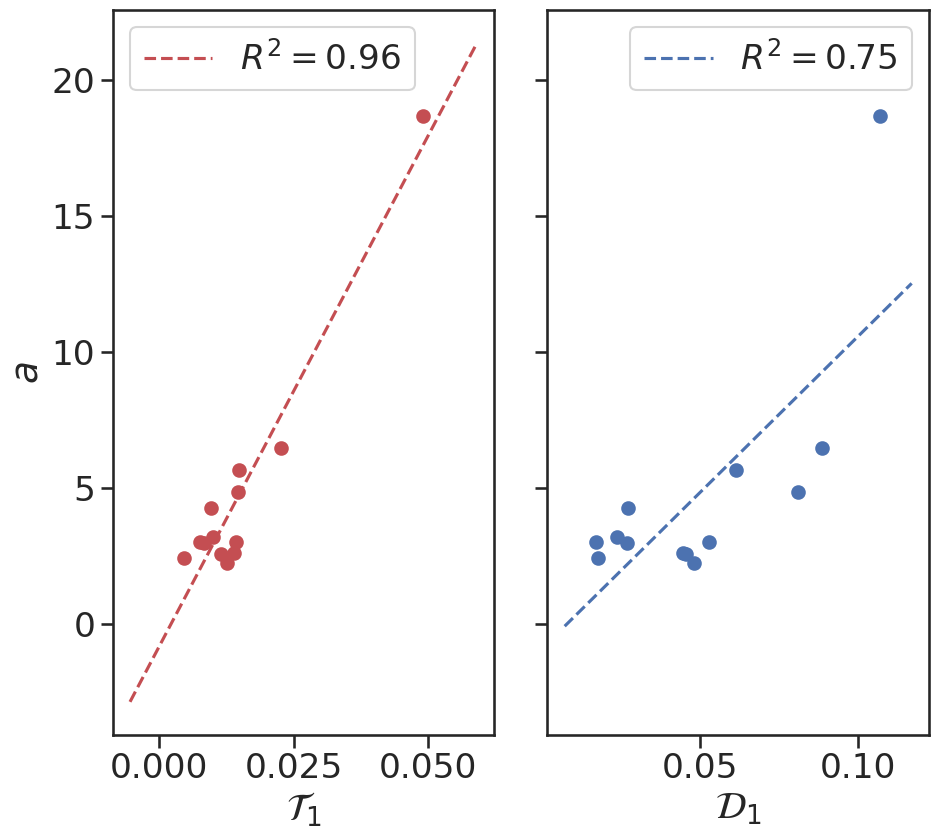

In [40]:
from scipy.stats import linregress

sns.set_theme(context="talk", font_scale=1.5, style="ticks")
reg1 = linregress(df_per_mol.t1diag, df_per_mol.a)
print(reg1)
display(reg1.rvalue)

x = np.linspace(df_per_mol.t1diag.min() - 0.01, df_per_mol.t1diag.max() + 0.01, 1000)

fig, (ax, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(10, 9)

# pal = sns.color_palette('husl', 13)
# colors = []

ax.scatter(df_per_mol.t1diag, df_per_mol.a, color='r', label="_t1diag")
ax.plot(x, reg1.intercept + reg1.slope*x, 'r', linestyle='--', label=r"$R^2 =$" + f"{reg1.rvalue:.2f}")


reg = linregress(df_per_mol.d1diag, df_per_mol.a)
print(reg)
display(reg.rvalue)

x = np.linspace(df_per_mol.d1diag.min() - 0.01, df_per_mol.d1diag.max() + 0.01, 1000)

ax2.scatter(df_per_mol.d1diag, df_per_mol.a, color='b', label="_bla")

# reg = linregress(df_per_mol.maxt2, df_per_mol.a)
# display(reg.rvalue)

# x = np.linspace(df_per_mol.maxt2.min() - 0.01, df_per_mol.maxt2.max() + 0.01, 1000)

# ax2.scatter(df_per_mol.maxt2, df_per_mol.a, color='b', label="_bla")

ax2.plot(x, reg.intercept + reg.slope*x, 'b', linestyle='--', label=r"$R^2 =$" + f"{reg.rvalue:.2f}")

ax.set_xlabel(r"$\mathcal{T}_1$")
ax2.set_xlabel(r"$\mathcal{D}_1$")
ax.set_ylabel(r"$a$")

# ax.legend(labels=[r"$R^2 =$" + f"{reg1.rvalue:.3f}"])
# ax2.legend(labels=[])
ax.legend()
ax2.legend()
plt.tight_layout()

plt.savefig("prefactor_diagnostic_relation.pdf", dpi=300)

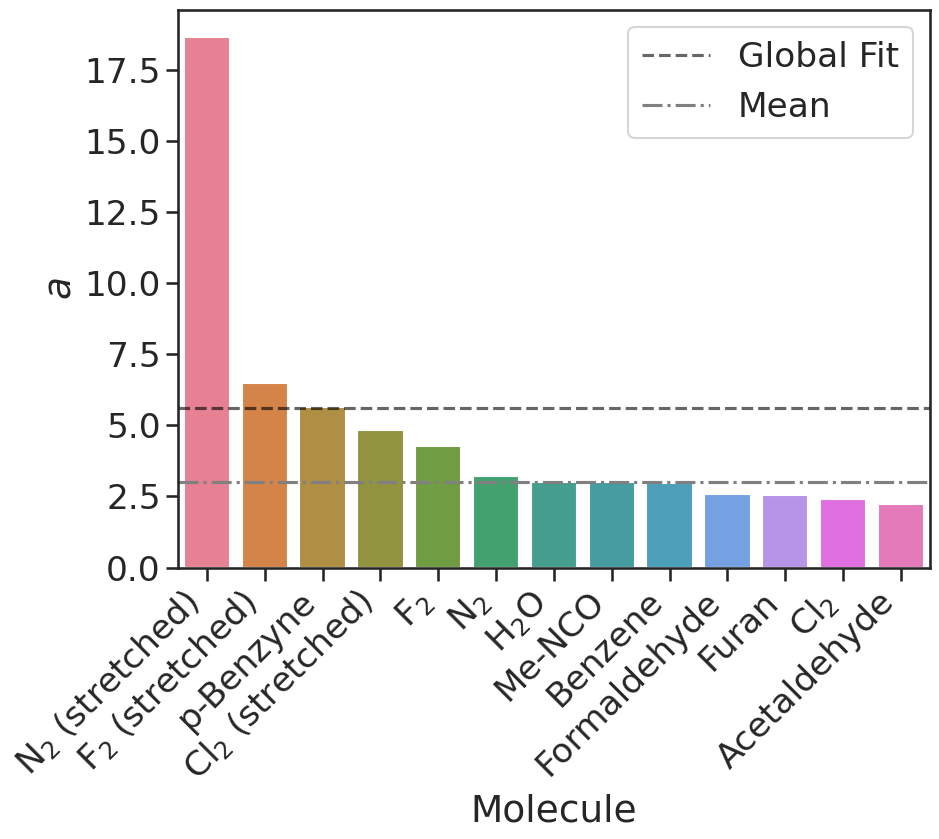

In [41]:
df_per_mol_fits = pd.read_hdf("per_molecule_prefactor_fits.h5", key="df")
sns.set_theme(context="talk", font_scale=1.5, style="ticks")
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 9)
sns.barplot(data=df_per_mol_fits, x="molname", y="a", palette="husl", ax=ax)
# ax.get_xticks(rotation=90)
labels = ax.get_xticklabels()
nice_molnames = {
    "n2_stretched": r"N$_2$ (stretched)",
    "f2_stretched": r"F$_2$ (stretched)",
    "p-benzyne": r"p-Benzyne",
    "cl2_stretched": r"Cl$_2$ (stretched)",
    "f2": r"F$_2$",
    "n2": r"N$_2$",
    "h2o": r"H$_2$O",
    "nco": r"Me-NCO",
    "benzene": r"Benzene",
    "formaldehyde": r"Formaldehyde",
    "acetaldehyde": r"Acetaldehyde",
    "furan": r"Furan",
    "cl2": r"Cl$_2$",
}

labels = [nice_molnames[k.get_text()] for k in labels]

ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel(r"$a$")
ax.set_xlabel("Molecule")
# ax.axhline(
#     y=df_per_mol_fits['a'].median(), linestyle="--", color="gray", alpha=0.6, label="Median"
# )
a_fit = 5.594350298422523
ax.axhline(
    y=a_fit, linestyle="--", color="black", alpha=0.6, label="Global Fit"
)
ax.axhline(
    y=df_per_mol_fits['a'].median(), linestyle="-.", color="gray", alpha=1.0, label="Mean"
)
ax.legend()
plt.tight_layout()
plt.savefig("prefactor_per_molecule.png", dpi=300)
plt.savefig("prefactor_per_molecule.pdf", dpi=300)

In [42]:
df_per_mol['mollabel'] = df_per_mol['molname'].map(nice_molnames)
df_per_mol.set_index('molname', inplace=True)
df_per_mol = df_per_mol.reindex(nice_molnames.keys())

In [43]:
df_per_mol = df_per_mol[['mollabel', 'a', 't1diag', 'd1diag']]
df_per_mol.set_index('mollabel', inplace=True)
df_per_mol

,a,t1diag,d1diag
mollabel,,,
N$_2$ (stretched),18.669051,0.049073,0.106929
F$_2$ (stretched),6.476190,0.022695,0.088622
p-Benzyne,5.650327,0.014870,0.061429
Cl$_2$ (stretched),4.832977,0.014567,0.081032
F$_2$,4.270402,0.009680,0.027547
N$_2$,3.203512,0.010011,0.023822
H$_2$O,3.013966,0.007588,0.017423
Me-NCO,3.001943,0.014220,0.052977
Benzene,2.979277,0.008315,0.027102


In [44]:
df_per_mol.to_latex(
    f"tables/per_molecule_results.tex",
    # columns=['energy_fqe', 'energy_fqe_real', 'energy_ec', 'energy_qcqmc'],
    # float_format="$%.5f$",
    # header=None,
    # longtable=True,
    column_format="cSSS"
)